### Divided difference interpolation

This follows from the wk1 notes

A key benefit of this method is that you can add points without recalculating the former points. But, calculating the new points requires you to know the former point values. The coefficients are values, not functions, so therefore it should be inexpensive to store the values for future use.

TODO - create a method to take an existing table of coefficients and add a point, you should be able to get away with less computation.

In [18]:
function table = dividedDifferenceTable(points, pointsCount)
    # there must be as many levels to the table as there are points
    table = zeros(pointsCount);
    table(1,:) = transpose(points(:,2));
    
    # compute each row as an order of differences, of the previous row
    for i = 1:pointsCount
        for j = 1:(pointsCount-i)
            table(i+1,j) = (table(i,j+1) - table(i,j))/(points(i+1,1) - points(1,1));
        end
    end
end

In [19]:
function y = substitutedPoints(x, points, table)
    y = table(1,1);

    for i = 1:length(points)

        if i == 1
            continue;
        end
        
        # y = table(i=1,1) + ...
        #     table(i=2,1)*(x - points(j=1,1)) + ...
        #     table(i=3,1)*(x - points(j=1,1))*points(j=2,1) + ...
 
        productOfXDifferences = 1;
        for j = 1:(i-1)
            productOfXDifferences = productOfXDifferences .* (x .- points(j,1));
        end
        y = y .+ (productOfXDifferences .* table(i, 1));
    end
end

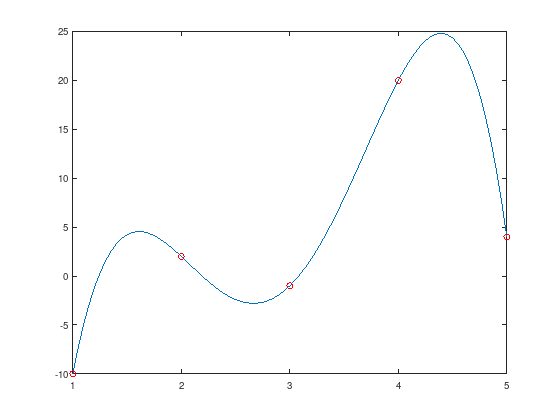

In [24]:
points = [1 -10;
          2 2;
          3 -1;
          4 20,
          5, 4];

xSpace = points(1,1):0.05:points(length(points),1);
pointsCount = length(points);
table = dividedDifferenceTable(points, pointsCount);

y = substitutedPoints(xSpace, points, table);

plot(xSpace, y);
hold on;
plot(points(:,1), points(:,2), "ro");